In [7]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from wordcloud import WordCloud
import spacy

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression

In [4]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ------------------- -------------------- 143.4/300.2 kB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 4.7 MB/s eta 0:00:00


DEPRECATION: Loading egg at d:\anaconda\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [6]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.4/99.8 MB 8.3 MB/s eta 0:00:13
    --------------------------------------- 1.7/99.8 MB 18.5 MB/s eta 0:00:06
   - -------------------------------------- 2.8/99.8 MB 20.0 MB/s eta 0:00:05
   - -------------------------------------- 4.4/99.8 MB 23.5 MB/s eta 0:00:05
   -- ------------------------------------- 5.6/99.8 MB 23.8 MB/s eta 0:00:04
   -- ------------------------------------- 7.4/99.8 MB 26.3 MB/s eta 0:00:04
   --- ------------------------------------ 8.2/99.8 MB 25.0 MB/s eta 0:00:04
   --- ------------------------------------ 9.0/99.8 MB 23.9 MB/s eta 0:00:04
   ---- ----------------

DEPRECATION: Loading egg at d:\anaconda\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [2]:
!pip install spacy
!python -m spacy download en_core_web_md

Defaulting to user installation because normal site-packages is not writeable

DEPRECATION: Loading egg at d:\anaconda\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



  Obtaining dependency information for spacy from https://files.pythonhosted.org/packages/92/fb/d1f0605e1e8627226c6c96053fe1632e9a04a3fbcd8b5d715528cb95eb97/spacy-3.7.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for spacy-legacy<3.1.0,>=3.0.11 from https://files.pythonhosted.org/packages/c3/55/12e842c70ff8828e34e543a2c7176dac4da006ca6901c9e8b43efab8bc6b/spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata
  Obtaining dependency information for spacy-loggers<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/33/78/d1a1a026ef3af911159398c939b1509d5c36fe524c7b644f34a5146c4e16/spacy_loggers-1.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for murmurhash<1.1.0,>=0.28.0 from https://files.pythonhosted.org/packages/71/46/af01a20ec368bd9cb49a1d2df15e3eca113bbf6952cc1f2a47f1c6801a7f/murmurhash-1.0.10-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cymem<2.1.0,>=2.0.2 from https://files.pythonhosted.org/packages/c1/c3/d

DEPRECATION: Loading egg at d:\anaconda\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..



     ---------------------------------------- 0.0/42.8 MB ? eta -:--:--
     ---------------------------------------- 0.3/42.8 MB 5.4 MB/s eta 0:00:08
     - -------------------------------------- 1.1/42.8 MB 11.5 MB/s eta 0:00:04
     -- ------------------------------------- 2.5/42.8 MB 17.6 MB/s eta 0:00:03
     ---- ----------------------------------- 4.4/42.8 MB 25.6 MB/s eta 0:00:02
     ------ --------------------------------- 6.8/42.8 MB 29.2 MB/s eta 0:00:02
     -------- ------------------------------- 8.8/42.8 MB 31.2 MB/s eta 0:00:02
     --------- ----------------------------- 10.6/42.8 MB 36.4 MB/s eta 0:00:01
     ----------- --------------------------- 13.0/42.8 MB 46.7 MB/s eta 0:00:01
     ------------- ------------------------- 15.0/42.8 MB 43.7 MB/s eta 0:00:01
     --------------- ----------------------- 16.5/42.8 MB 40.9 MB/s eta 0:00:01
     ---------------- ---------------------- 18.2/42.8 MB 43.7 MB/s eta 0:00:01
     ------------------ -------------------- 20.

In [8]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [10]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
df.drop(['id', 'host_id', 'host_name'], axis=1, inplace=True)

In [12]:
df.head()

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [13]:
#Data Visualization

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

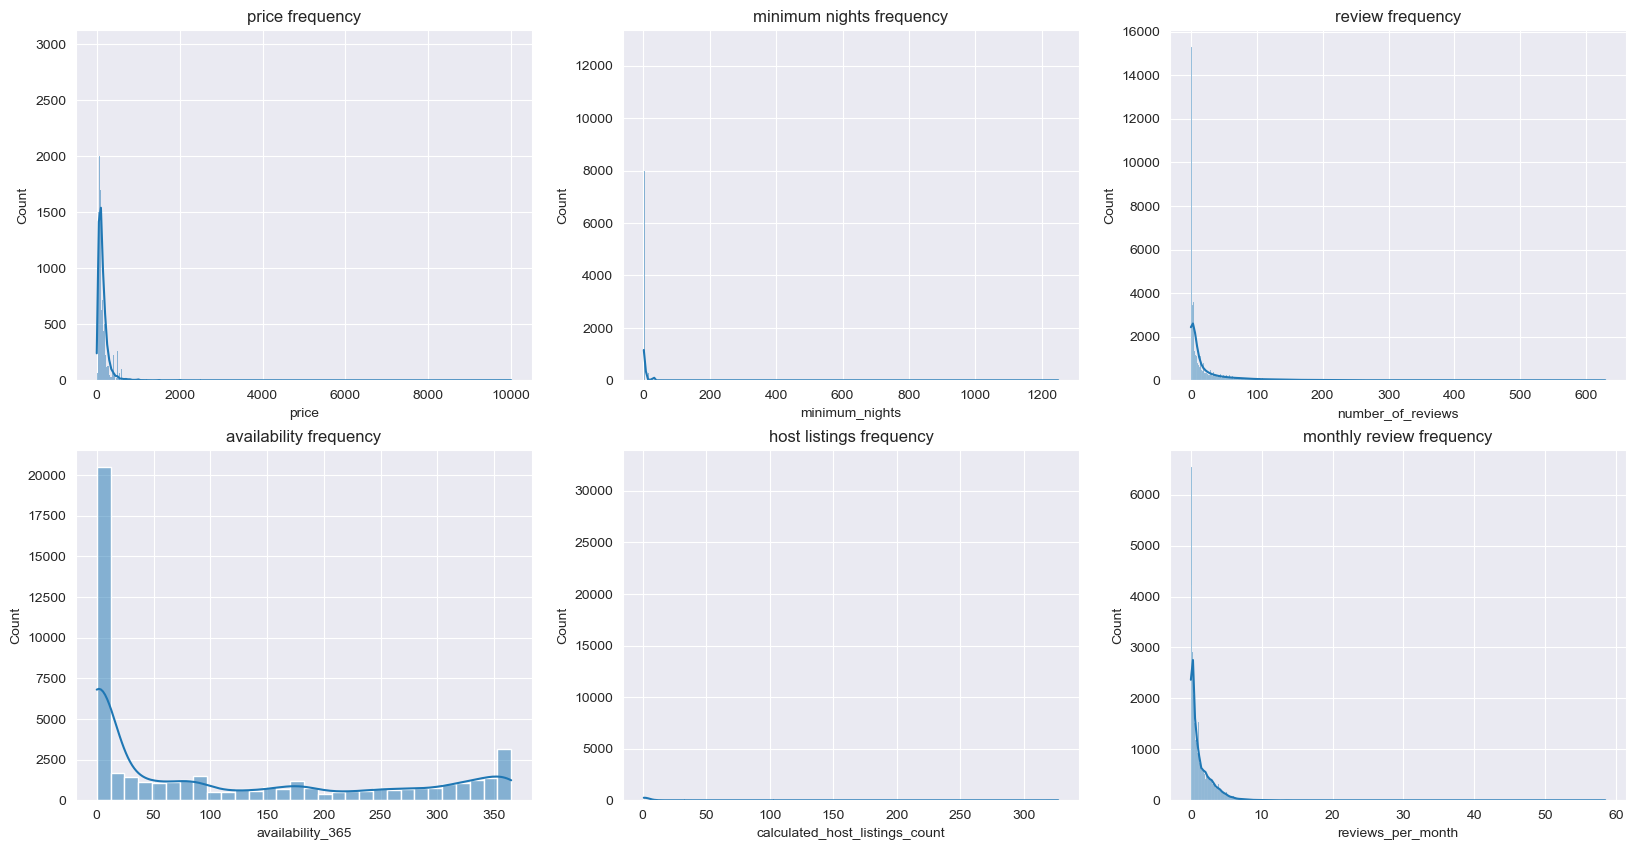

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

sns.histplot(df,x='price',kde=True,ax=axes[0,0])
axes[0,0].set_title('price frequency')

sns.histplot(df,x='minimum_nights',kde=True,ax=axes[0,1])
axes[0,1].set_title('minimum nights frequency')

sns.histplot(df,x='number_of_reviews',kde=True,ax=axes[0,2])
axes[0,2].set_title('review frequency')

sns.histplot(df,x='availability_365',kde=True,ax=axes[1,0])
axes[1,0].set_title('availability frequency')

sns.histplot(df,x='calculated_host_listings_count',kde=True,ax=axes[1,1])
axes[1,1].set_title('host listings frequency')

sns.histplot(df,x='reviews_per_month',kde=True,ax=axes[1,2])
axes[1,2].set_title('monthly review frequency')

plt.show()

In [15]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


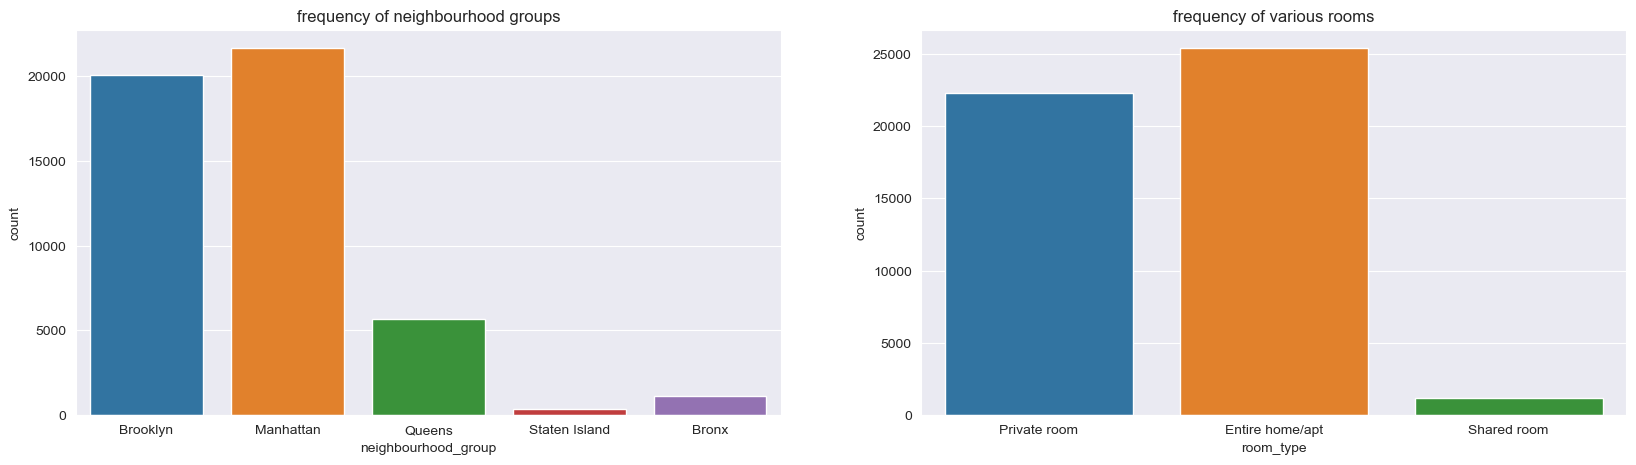

In [16]:
fig,axes = plt.subplots(1,2,figsize=(20,5))

sns.countplot(df,x='neighbourhood_group',ax=axes[0])
axes[0].set_title('frequency of neighbourhood groups')

sns.countplot(df,x='room_type',ax=axes[1])
axes[1].set_title('frequency of various rooms')

plt.show()

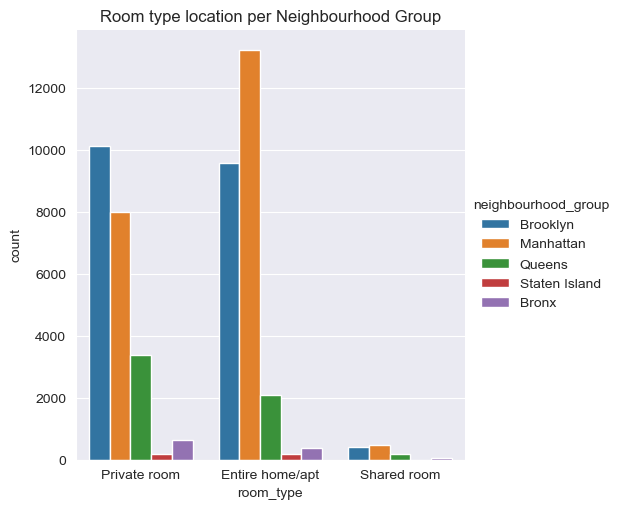

In [17]:
sns.catplot(x='room_type', kind="count", hue="neighbourhood_group", data=df);
plt.title('Room type location per Neighbourhood Group')
plt.ioff()

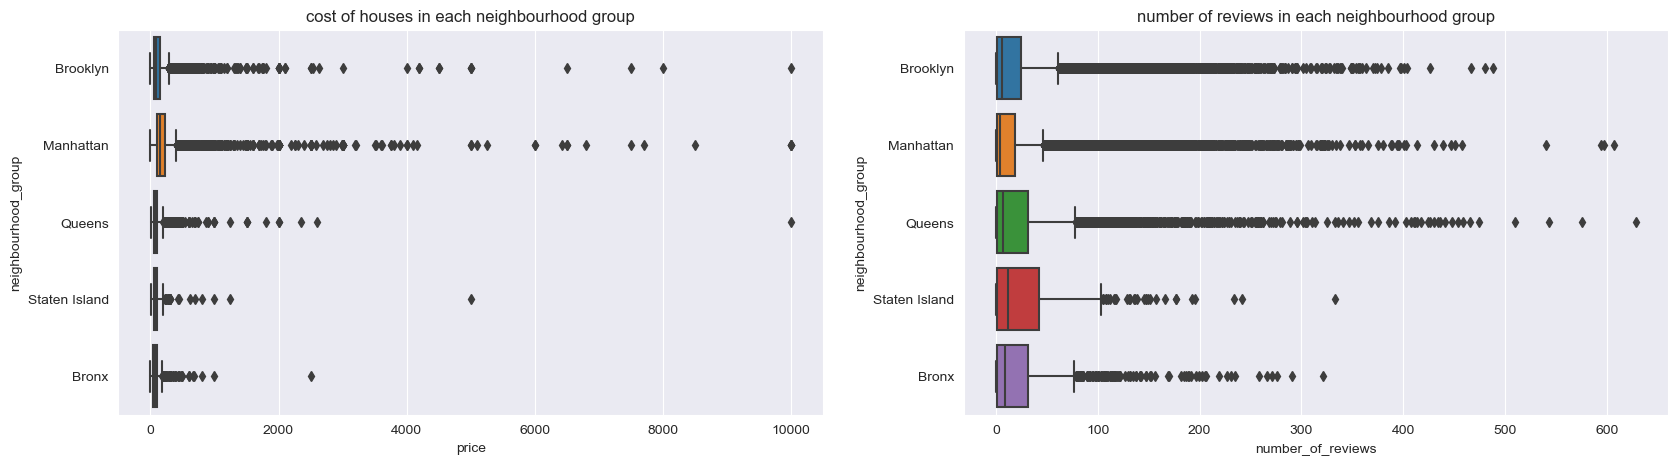

In [18]:
fig,axes = plt.subplots(1,2,figsize=(20,5))

sns.boxplot(df,x='price',y='neighbourhood_group',ax=axes[0])
axes[0].set_title('cost of houses in each neighbourhood group')

sns.boxplot(df,x='number_of_reviews',y='neighbourhood_group',ax=axes[1])
axes[1].set_title('number of reviews in each neighbourhood group')

plt.show()

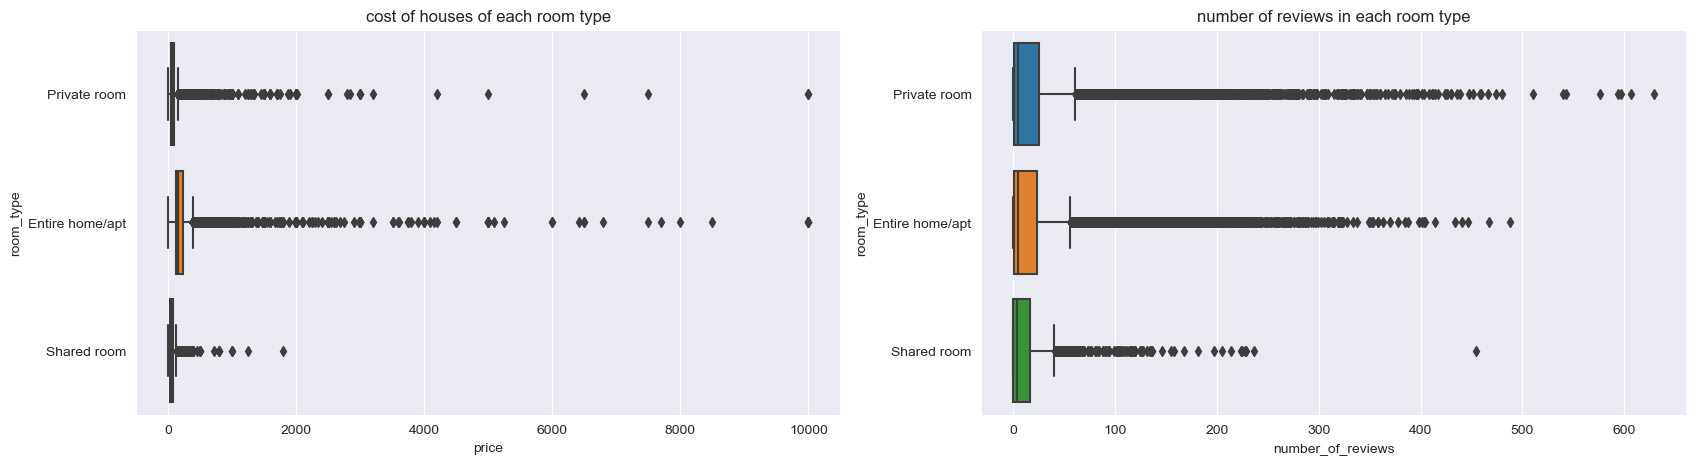

In [19]:
fig,axes = plt.subplots(1,2,figsize=(20,5))

sns.boxplot(df,x='price',y='room_type',ax=axes[0])
axes[0].set_title('cost of houses of each room type')

sns.boxplot(df,x='number_of_reviews',y='room_type',ax=axes[1])
axes[1].set_title('number of reviews in each room type')

plt.show()

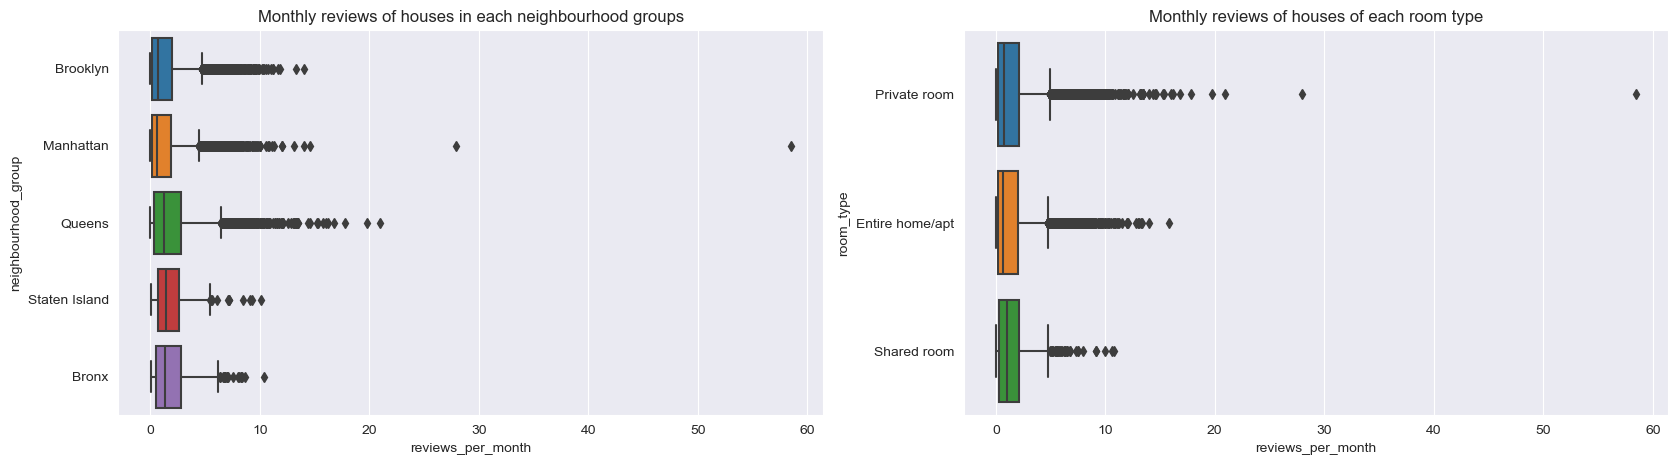

In [20]:
fig,axes = plt.subplots(1,2,figsize=(20,5))

sns.boxplot(df,x='reviews_per_month',y='neighbourhood_group',ax=axes[0])
axes[0].set_title('Monthly reviews of houses in each neighbourhood groups')

sns.boxplot(df,x='reviews_per_month',y='room_type',ax=axes[1])
axes[1].set_title('Monthly reviews of houses of each room type')

plt.show()

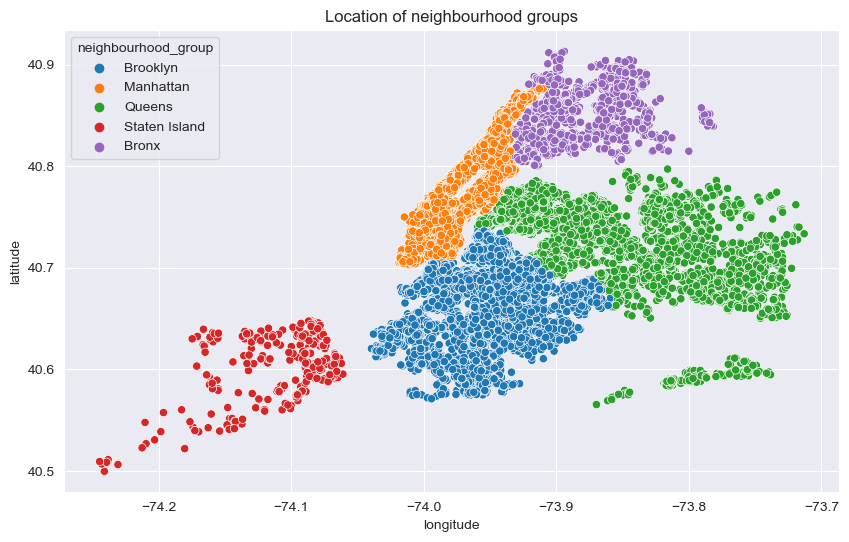

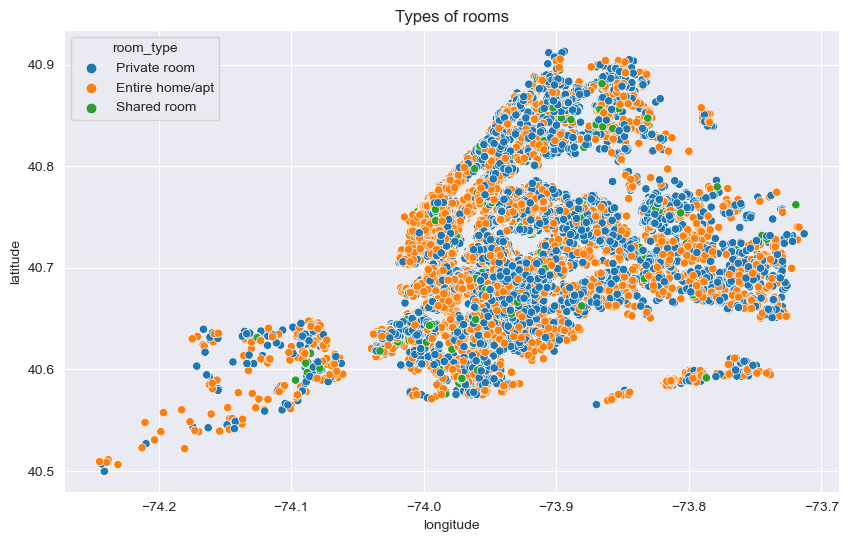

In [21]:
title = 'Location of neighbourhood groups'
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['longitude'],y=df['latitude'],hue=df.neighbourhood_group).set_title(title)
plt.show()

title = 'Types of rooms'
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['longitude'],y=df['latitude'],hue=df.room_type).set_title(title)
plt.show()

In [22]:
# replacing the null values of reviews_per_month field by the mean of the medians of respective category
neighbourhood_medians = df.groupby('neighbourhood_group')['reviews_per_month'].transform("median")
roomtype_medians = df.groupby('room_type')['reviews_per_month'].transform("median")

medians = (neighbourhood_medians + roomtype_medians) / 2.0

df['reviews_per_month'].fillna(medians, inplace=True)

In [23]:
# applying log function
# adding minimum to each field to avoid anomaly of log(0)

df.minimum_nights += 0.000000001
df['minimum_nights'] = np.log10(df['minimum_nights'])
df.number_of_reviews += 0.000000001
df['number_of_reviews'] = np.log10(df['number_of_reviews'])
df.reviews_per_month += 0.000000001
df['reviews_per_month'] = np.log10(df['reviews_per_month'])
df.calculated_host_listings_count += 0.000000001
df['calculated_host_listings_count'] = np.log10(df['calculated_host_listings_count'])
df.availability_365 += 0.000000001
df['availability_365'] = np.log10(df['availability_365'])
df.price += 0.000000001
df['price'] = np.log10(df['price'])

# from sklearn.preprocessing import PowerTransformer
# p = PowerTransformer()
# data['price']=p.fit_transform(data[['price']])
# sns.distplot(data.price)

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

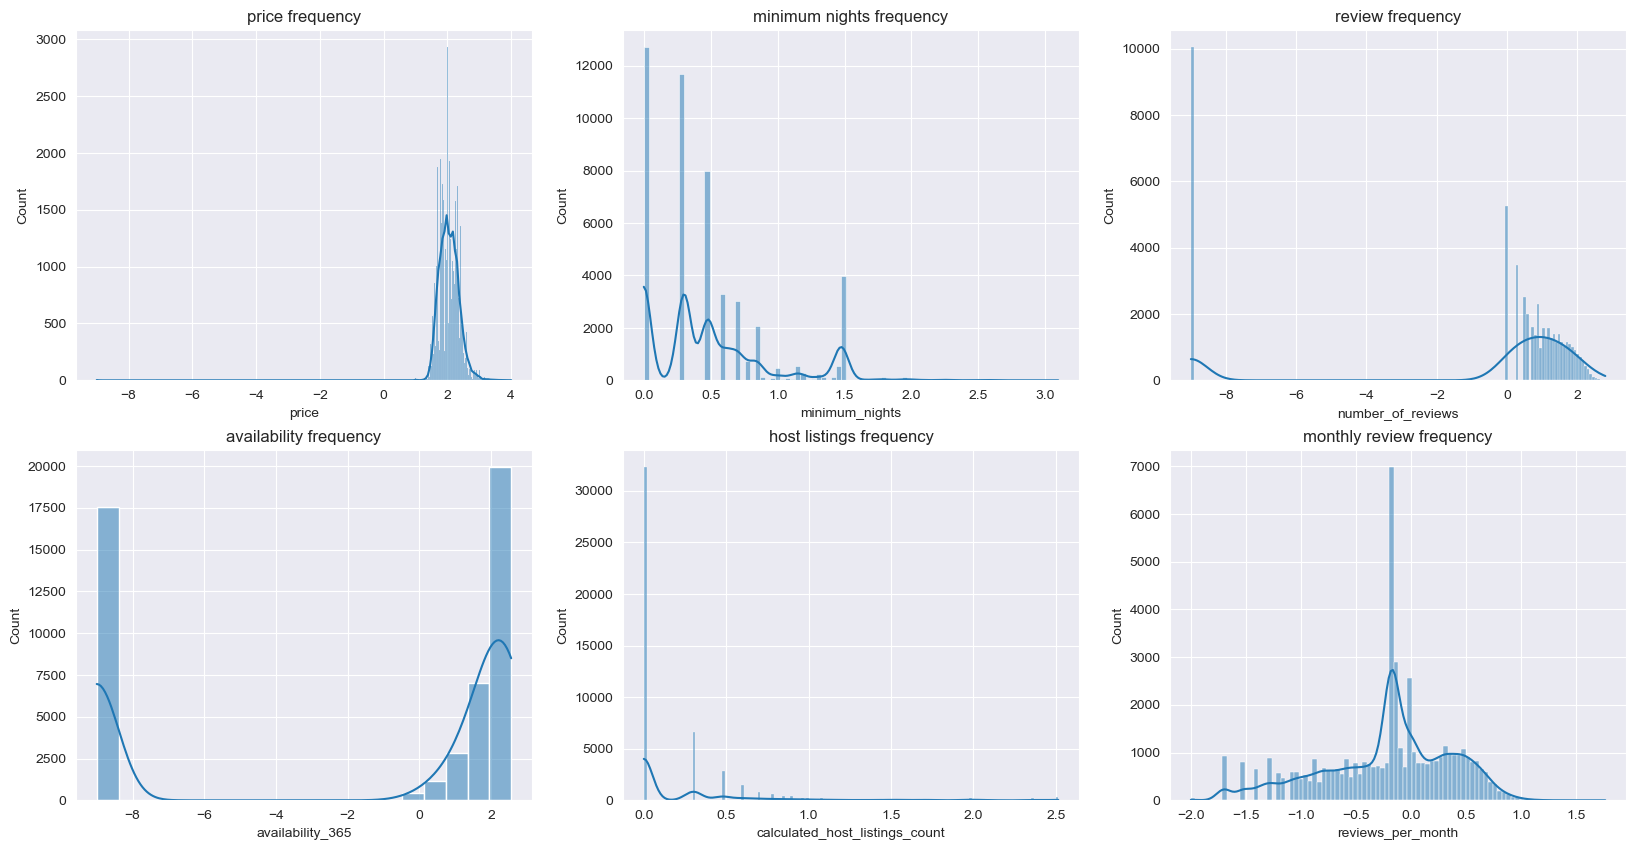

In [24]:
# histplot after log transformation
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

sns.histplot(df,x='price',kde=True,ax=axes[0,0])
axes[0,0].set_title('price frequency')

sns.histplot(df,x='minimum_nights',kde=True,ax=axes[0,1])
axes[0,1].set_title('minimum nights frequency')

sns.histplot(df,x='number_of_reviews',kde=True,ax=axes[0,2])
axes[0,2].set_title('review frequency')

sns.histplot(df,x='availability_365',kde=True,ax=axes[1,0])
axes[1,0].set_title('availability frequency')

sns.histplot(df,x='calculated_host_listings_count',kde=True,ax=axes[1,1])
axes[1,1].set_title('host listings frequency')

sns.histplot(df,x='reviews_per_month',kde=True,ax=axes[1,2])
axes[1,2].set_title('monthly review frequency')

plt.show()


In [25]:
# converting categoical values into numerical variables
neighbourhood_mappings = {"Brooklyn": 1, "Manhattan": 2, "Queens": 3, 'Staten Island':4, 'Bronx':5}
df['neighbourhood_group'] = df['neighbourhood_group'].map(neighbourhood_mappings)
room_mappings = {'Private room':1, 'Entire home/apt':2, 'Shared room':3}
df['room_type'] = df['room_type'].map(room_mappings)

In [26]:
# dropping unneeded features
df.drop(['last_review', 'neighbourhood', 'latitude', 'longitude'], axis=1, inplace=True)

In [27]:
def remove_characters(text):
    text = re.sub(r'[^\w\s]', '', text)
    return text

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in word_tokenize(text) if word.lower() not in stop_words]
    return ' '.join(tokens)

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in word_tokenize(text)]
    return ' '.join(lemmatized_tokens)

In [32]:
# text preprocessing
df['name'].fillna('', inplace=True)
df['name'] = df['name'].apply(lambda x: x.lower())
df['name'] = df['name'].apply(lambda x: remove_stopwords(x))
df['name'] = df['name'].apply(lambda x: remove_characters(x))

In [31]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\B\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

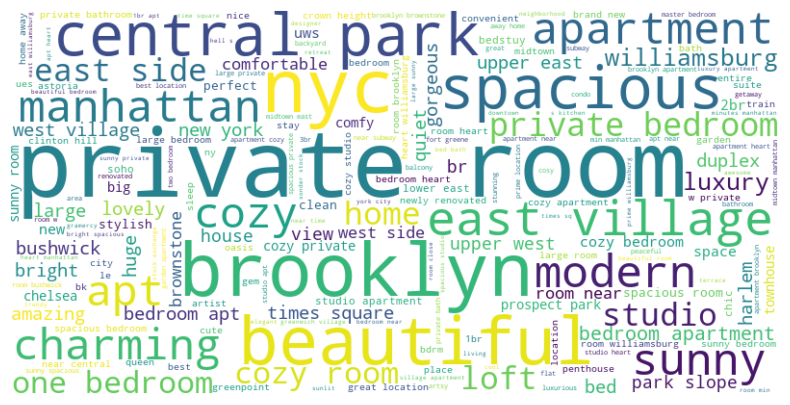

In [33]:
# wordcloud representation
corpus = ' '.join(df['name'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(corpus)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [35]:
# feature engineering
nlp = spacy.load('en_core_web_md')

df['vectors'] = df['name'].apply(lambda x:nlp(x).vector)

In [36]:
df.head()

,name,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,vectors
0,clean quiet apt home park,1,1,2.173186,4.342945e-10,0.954243,-0.677781,7.781513e-01,2.562293,"[-0.14658737, 3.2840998, -2.1448166, -1.581601..."
1,skylit midtown castle,2,2,2.352183,4.342945e-10,1.653213,-0.420216,3.010300e-01,2.550228,"[0.25546, -0.49063334, -2.1143835, -1.5185766,..."
2,village harlem new york,2,1,2.176091,4.771213e-01,-9.000000,-0.161151,4.342945e-10,2.562293,"[-0.15934606, -0.5780781, -0.76726997, -1.0546..."
3,cozy entire floor brownstone,1,2,1.949390,4.342945e-10,2.431364,0.666518,4.342945e-10,2.287802,"[-1.03585, 0.54893816, -3.6025498, -1.095375, ..."
4,entire apt spacious studioloft central park,2,2,1.903090,1.000000e+00,0.954243,-1.000000,4.342945e-10,-9.000000,"[-1.0403415, 2.3425715, -2.4549, -0.6203028, 1..."


In [37]:
# splitting dat into dependent and independent variables
X = df[['neighbourhood_group', 'room_type', 'minimum_nights',
        'number_of_reviews', 'reviews_per_month',
        'calculated_host_listings_count', 'availability_365']]
y = df['price']

In [38]:
text_vector_dimensions = pd.DataFrame(df['vectors'].to_list(), columns=[f'text_dim_{i}' for i in range(300)])  # Assuming 300 dimensions
X = pd.concat([X, text_vector_dimensions], axis=1)

In [39]:
X.head()

,neighbourhood_group,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,text_dim_0,text_dim_1,text_dim_2,...,text_dim_290,text_dim_291,text_dim_292,text_dim_293,text_dim_294,text_dim_295,text_dim_296,text_dim_297,text_dim_298,text_dim_299
0,1,1,4.342945e-10,0.954243,-0.677781,7.781513e-01,2.562293,-0.146587,3.284100,-2.144817,...,-2.677567,-0.694635,1.491832,-0.496267,-0.233425,-0.713667,-2.504119,1.237215,-2.460700,-0.358075
1,2,2,4.342945e-10,1.653213,-0.420216,3.010300e-01,2.550228,0.255460,-0.490633,-2.114383,...,-3.017833,0.834002,2.386033,2.980500,0.718530,2.660797,-2.294565,0.881977,0.001093,0.845293
2,2,1,4.771213e-01,-9.000000,-0.161151,4.342945e-10,2.562293,-0.159346,-0.578078,-0.767270,...,0.102800,1.838256,0.214127,0.761944,-1.145640,0.133800,-0.796514,-1.099194,-1.999304,0.470840
3,1,2,4.342945e-10,2.431364,0.666518,4.342945e-10,2.287802,-1.035850,0.548938,-3.602550,...,-0.633273,0.380543,1.274905,1.294852,-2.266935,3.091162,-2.189317,1.236675,0.014398,0.478725
4,2,2,1.000000e+00,0.954243,-1.000000,4.342945e-10,-9.000000,-1.040341,2.342571,-2.454900,...,-2.402460,0.340506,1.384471,0.934267,0.637694,0.920904,-2.118228,0.311579,-1.699134,0.556487


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf = RandomForestRegressor()
clf.fit(X_train, y_train)

RandomForestRegressor()

In [43]:
print('Results for Random Forest Regressor')
print('Evaluation on Training data')
print('R2 score : ',np.round(r2_score(y_train, clf.predict(X_train)),2))
print('MSE: ', np.round(mean_squared_error(y_train,clf.predict(X_train)),2))
print('MAE: ', np.round(mean_squared_error(y_train,clf.predict(X_train)),2))
print('----------------------------------------')
print('Evaluation on Testing data')
print('R2 score : ',np.round(r2_score(y_test, clf.predict(X_test)),2))
print('MSE: ', np.round(mean_squared_error(y_test,clf.predict(X_test)),2))
print('MAE: ', np.round(mean_squared_error(y_test,clf.predict(X_test)),2))

Results for Random Forest Regressor
Evaluation on Training data
R2 score :  0.92
MSE:  0.01
MAE:  0.01
----------------------------------------
Evaluation on Testing data
R2 score :  0.43
MSE:  0.07
MAE:  0.07


In [44]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror',  
    'max_depth': 5,                  
    'learning_rate': 0.05,            
    'n_estimators': 100              
}

xg = xgb.train(params, dtrain, num_boost_round=params['n_estimators'])

C:\Users\B\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:160: UserWarning: [14:21:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [45]:
print('Results for XG Boost')
print('Evaluation on Training data')
print('R2 score: ',np.round(r2_score(y_train, xg.predict(dtrain)),2))
print('MSE: ', np.round(mean_squared_error(y_train,xg.predict(dtrain)),2))
print('MAE: ', np.round(mean_absolute_error(y_train,xg.predict(dtrain)),2))
print('----------------------------------------')
print('Evaluation on Testing data')
print('R2 score: ',np.round(r2_score(y_test, xg.predict(dtest)),2))
print('MSE: ', np.round(mean_squared_error(y_test,xg.predict(dtest)),2))
print('MAE: ', np.round(mean_absolute_error(y_test,xg.predict(dtest)),2))

Results for XG Boost
Evaluation on Training data
R2 score:  0.61
MSE:  0.05
MAE:  0.14
----------------------------------------
Evaluation on Testing data
R2 score:  0.43
MSE:  0.07
MAE:  0.15


In [46]:
var = pd.DataFrame({'Actual': np.round(10 ** y_test, 0), 
                   'Predicted': np.round(10 ** xg.predict(dtest), 0)})
var.head(10)

,Actual,Predicted
43813,225.0,186.0
32734,649.0,224.0
25276,300.0,189.0
36084,26.0,56.0
17736,125.0,151.0
15253,49.0,68.0
7332,100.0,113.0
40178,175.0,105.0
48175,85.0,99.0
14403,70.0,83.0


In [47]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [48]:
print('Results for Multiple Linear Regression')
print('Evaluation on Training data')
print('R2 score: ',np.round(r2_score(y_train, lr.predict(X_train)),2))
print('MSE: ', np.round(mean_squared_error(y_train,lr.predict(X_train)),2))
print('MAE: ', np.round(mean_absolute_error(y_train,lr.predict(X_train)),2))
print('----------------------------------------')
print('Evaluation on Testing data')
print('R2 score: ',np.round(r2_score(y_test, lr.predict(X_test)),2))
print('MSE: ', np.round(mean_squared_error(y_test,lr.predict(X_test)),2))
print('MAE: ', np.round(mean_absolute_error(y_test,lr.predict(X_test)),2))

Results for Multiple Linear Regression
Evaluation on Training data
R2 score:  0.33
MSE:  0.08
MAE:  0.17
----------------------------------------
Evaluation on Testing data
R2 score:  0.34
MSE:  0.08
MAE:  0.17


In [49]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=1.0, epsilon=0.2)

svr.fit(X_train, y_train)

SVR(epsilon=0.2)

In [50]:
print('Results for Support Vector Machine')
print('Evaluation on Training data')
print('R2 score: ',np.round(r2_score(y_train, svr.predict(X_train)),2))
print('MSE: ', np.round(mean_squared_error(y_train,svr.predict(X_train)),2))
print('MAE: ', np.round(mean_absolute_error(y_train,svr.predict(X_train)),2))
print('----------------------------------------')
print('Evaluation on Testing data')
print('R2 score: ',np.round(r2_score(y_test, svr.predict(X_test)),2))
print('MSE: ', np.round(mean_squared_error(y_test,svr.predict(X_test)),2))
print('MAE: ', np.round(mean_absolute_error(y_test,svr.predict(X_test)),2))

Results for Support Vector Machine
Evaluation on Training data
R2 score:  0.49
MSE:  0.06
MAE:  0.14
----------------------------------------
Evaluation on Testing data
R2 score:  0.4
MSE:  0.07
MAE:  0.16
